In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Task 3. A)-

In [2]:
! pip install gdown 

In [3]:
!gdown https://drive.google.com/uc?id=1jnw2JdMUw7DS1xZch7v8QihWO2UDQewN

Downloading...
From: https://drive.google.com/uc?id=1jnw2JdMUw7DS1xZch7v8QihWO2UDQewN
To: /content/HIGGS.zip.gz
1.56GB [00:25, 61.1MB/s]


In [4]:
import gzip
import csv
import pandas as pd

df = pd.read_csv('/content/HIGGS.zip.gz', compression='gzip', header=0, error_bad_lines=False)

In [5]:
df.head()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,-6.536741852760314941e-01,9.303491115570068359e-01,1.107436060905456543e+00,1.138904333114624023e+00,-1.578198313713073730e+00,-1.046985387802124023e+00,0.000000000000000000e+00.1,6.579295396804809570e-01,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,0.643110,1.426367,0.000000,0.921661,-1.190432,-1.615589,0.000000,0.651114,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


## Basic EDA

In [6]:
# Knowing the Data
def about_data(df):
    col=df.columns
    skewness=df.skew()
    return col, df.shape, df.isnull().sum(), skewness
    

In [ ]:
columns,shape,null_values, skewness= about_data(df)
print(" cols in Dataset is :---")
print(columns)


 cols in Dataset is :---
Index(['1.000000000000000000e+00', '8.692932128906250000e-01',
       '-6.350818276405334473e-01', '2.256902605295181274e-01',
       '3.274700641632080078e-01', '-6.899932026863098145e-01',
       '7.542022466659545898e-01', '-2.485731393098831177e-01',
       '-1.092063903808593750e+00', '0.000000000000000000e+00',
       '1.374992132186889648e+00', '-6.536741852760314941e-01',
       '9.303491115570068359e-01', '1.107436060905456543e+00',
       '1.138904333114624023e+00', '-1.578198313713073730e+00',
       '-1.046985387802124023e+00', '0.000000000000000000e+00.1',
       '6.579295396804809570e-01', '-1.045456994324922562e-02',
       '-4.576716944575309753e-02', '3.101961374282836914e+00',
       '1.353760004043579102e+00', '9.795631170272827148e-01',
       '9.780761599540710449e-01', '9.200048446655273438e-01',
       '7.216574549674987793e-01', '9.887509346008300781e-01',
       '8.766783475875854492e-01'],
      dtype='object')


In [ ]:
print("shape of data is :-",shape)
print('')
print("null Values in dataset is :",'\n')
print(null_values)

shape of data is :- (5999999, 29)

null Values in dataset is : 

1.000000000000000000e+00      0
8.692932128906250000e-01      0
-6.350818276405334473e-01     0
2.256902605295181274e-01      0
3.274700641632080078e-01      0
-6.899932026863098145e-01     0
7.542022466659545898e-01      0
-2.485731393098831177e-01     0
-1.092063903808593750e+00     0
0.000000000000000000e+00      0
1.374992132186889648e+00      0
-6.536741852760314941e-01     0
9.303491115570068359e-01      0
1.107436060905456543e+00      0
1.138904333114624023e+00      0
-1.578198313713073730e+00     0
-1.046985387802124023e+00     0
0.000000000000000000e+00.1    0
6.579295396804809570e-01      0
-1.045456994324922562e-02     0
-4.576716944575309753e-02     0
3.101961374282836914e+00      0
1.353760004043579102e+00      0
9.795631170272827148e-01      0
9.780761599540710449e-01      0
9.200048446655273438e-01      0
7.216574549674987793e-01      0
9.887509346008300781e-01      0
8.766783475875854492e-01      0
dtype: 

In [ ]:
print("skewness is :",'\n')
skewness      

skewness is : 



1.000000000000000000e+00     -0.119107
8.692932128906250000e-01      1.750431
-6.350818276405334473e-01    -0.000024
2.256902605295181274e-01     -0.000612
3.274700641632080078e-01      1.491011
-6.899932026863098145e-01    -0.001000
7.542022466659545898e-01      1.906270
-2.485731393098831177e-01     0.000307
-1.092063903808593750e+00     0.000359
0.000000000000000000e+00      0.158172
1.374992132186889648e+00      1.973255
-6.536741852760314941e-01     0.000865
9.303491115570068359e-01      0.000419
1.107436060905456543e+00      0.195109
1.138904333114624023e+00      1.702261
-1.578198313713073730e+00    -0.001124
-1.046985387802124023e+00     0.000909
0.000000000000000000e+00.1    0.438865
6.579295396804809570e-01      1.723899
-1.045456994324922562e-02    -0.000511
-4.576716944575309753e-02     0.000227
3.101961374282836914e+00      0.759401
1.353760004043579102e+00      6.462415
9.795631170272827148e-01      4.969471
9.780761599540710449e-01      4.581438
9.200048446655273438e-01 

In [7]:
# Taking log to skewwd the features

df['8.692932128906250000e-01']=np.log1p(df['8.692932128906250000e-01'])
df['3.274700641632080078e-01']= np.log1p(df['3.274700641632080078e-01'])
df['7.542022466659545898e-01']= np.log1p(df['7.542022466659545898e-01'])
df['1.374992132186889648e+00']= np.log1p(df['1.374992132186889648e+00'])
df['1.138904333114624023e+00']= np.log1p(df['1.138904333114624023e+00'])
df['6.579295396804809570e-01']= np.log1p(df['6.579295396804809570e-01'])

# updated skewness
df.skew()

1.000000000000000000e+00     -0.119107
8.692932128906250000e-01      0.788396
-6.350818276405334473e-01    -0.000024
2.256902605295181274e-01     -0.000612
3.274700641632080078e-01      0.398069
-6.899932026863098145e-01    -0.001000
7.542022466659545898e-01      0.906808
-2.485731393098831177e-01     0.000307
-1.092063903808593750e+00     0.000359
0.000000000000000000e+00      0.158172
1.374992132186889648e+00      0.835741
-6.536741852760314941e-01     0.000865
9.303491115570068359e-01      0.000419
1.107436060905456543e+00      0.195109
1.138904333114624023e+00      0.682602
-1.578198313713073730e+00    -0.001124
-1.046985387802124023e+00     0.000909
0.000000000000000000e+00.1    0.438865
6.579295396804809570e-01      0.814621
-1.045456994324922562e-02    -0.000511
-4.576716944575309753e-02     0.000227
3.101961374282836914e+00      0.759401
1.353760004043579102e+00      6.462415
9.795631170272827148e-01      4.969471
9.780761599540710449e-01      4.581438
9.200048446655273438e-01 

###  skewed issue resolved

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999999 entries, 0 to 5999998
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   1.000000000000000000e+00    float64
 1   8.692932128906250000e-01    float64
 2   -6.350818276405334473e-01   float64
 3   2.256902605295181274e-01    float64
 4   3.274700641632080078e-01    float64
 5   -6.899932026863098145e-01   float64
 6   7.542022466659545898e-01    float64
 7   -2.485731393098831177e-01   float64
 8   -1.092063903808593750e+00   float64
 9   0.000000000000000000e+00    float64
 10  1.374992132186889648e+00    float64
 11  -6.536741852760314941e-01   float64
 12  9.303491115570068359e-01    float64
 13  1.107436060905456543e+00    float64
 14  1.138904333114624023e+00    float64
 15  -1.578198313713073730e+00   float64
 16  -1.046985387802124023e+00   float64
 17  0.000000000000000000e+00.1  float64
 18  6.579295396804809570e-01    float64
 19  -1.045456994324922562

In [ ]:
df.describe()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
count,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,...,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06,5.999999e+06
mean,5.297241e-01,6.547449e-01,-6.211286e-06,3.632830e-04,6.523263e-01,3.201955e-05,6.645482e-01,-5.361408e-04,-8.922177e-05,1.000497e+00,...,5.495726e-05,1.010779e-05,9.995069e-01,1.034293e+00,1.024772e+00,1.050405e+00,1.009734e+00,9.730288e-01,1.033050e+00,9.597648e-01
std,4.991157e-01,2.520589e-01,1.008915e+00,1.006282e+00,2.772895e-01,1.006247e+00,2.119820e-01,1.009190e+00,1.005880e+00,1.027797e+00,...,1.007736e+00,1.006360e+00,1.400049e+00,6.733135e-01,3.804712e-01,1.640427e-01,3.974409e-01,5.255591e-01,3.653359e-01,3.133356e-01
min,0.000000e+00,2.427082e-01,-2.434976e+00,-1.742508e+00,3.943002e-04,-1.743944e+00,1.289961e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,8.349229e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.812501e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,4.639776e-01,-7.392965e-01,-8.713760e-01,4.552646e-01,-8.711470e-01,5.181940e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,...,-7.133574e-01,-8.720338e-01,0.000000e+00,7.906300e-01,8.462154e-01,9.857487e-01,7.675424e-01,6.738654e-01,8.194172e-01,7.703784e-01
50%,1.000000e+00,6.169076e-01,9.198132e-04,9.714414e-04,6.372914e-01,3.783033e-04,6.390268e-01,-1.015666e-03,-4.961938e-04,1.086538e+00,...,3.721330e-04,-2.642369e-04,0.000000e+00,8.949544e-01,9.506519e-01,9.897749e-01,9.165314e-01,8.734430e-01,9.473684e-01,8.718743e-01
75%,1.000000e+00,8.047080e-01,7.382142e-01,8.709940e-01,8.297210e-01,8.714819e-01,7.750682e-01,6.862039e-01,8.683126e-01,2.173076e+00,...,7.141017e-01,8.710505e-01,3.101961e+00,1.024868e+00,1.083482e+00,1.020313e+00,1.142169e+00,1.138593e+00,1.140515e+00,1.059126e+00
max,1.000000e+00,2.433264e+00,2.434868e+00,1.743236e+00,2.797087e+00,1.743257e+00,2.287331e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,3.107619e+01,1.563786e+01,7.992739e+00,1.426244e+01,1.776285e+01,8.779915e+00,6.966903e+00


### checking for Imbalancing of Classes 

In [ ]:
df['1.000000000000000000e+00'].value_counts()

1.0    3178344
0.0    2821655
Name: 1.000000000000000000e+00, dtype: int64

#### both classes looking Balanced

## Dividing 21 Features and  7 functions 

In [8]:
def divide_features(df):
    y=df.iloc[:,0].values
    x=df.iloc[:,1:22].values
    return x,y,x.shape,y.shape
    

In [9]:
x,y,x_shape,y_shape=divide_features(df)
print("shape of depending features(x)  :-    ",x_shape ,'\n')
print("shape of required output features(x)  :- ",y_shape )

shape of depending features(x)  :-     (5999999, 21) 

shape of required output features(x)  :-  (5999999,)


### Outliers detection 

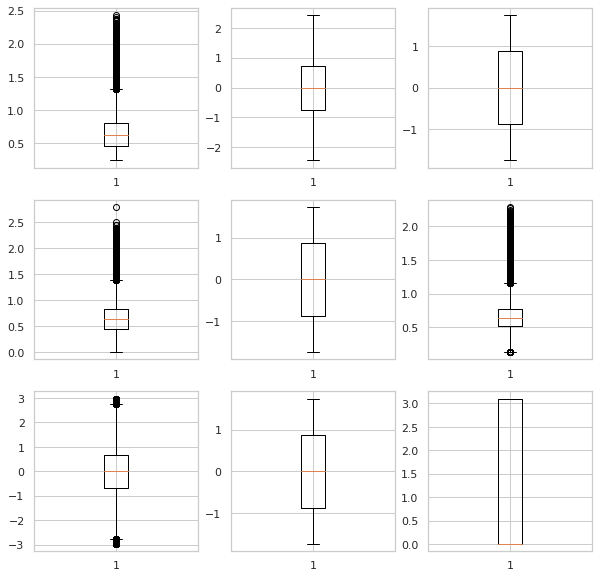

In [ ]:
# Plotting boxplot for outliers detection 

plt.subplots(3,3,figsize=(10,10))
plt.subplot(3,3,1)
plt.boxplot(x[:,0])
plt.subplot(3,3,2)
plt.boxplot(x[:,1])
plt.subplot(3,3,3)
plt.boxplot(x[:,2])
plt.subplot(3,3,4)
plt.boxplot(x[:,3])
plt.subplot(3,3,5)
plt.boxplot(x[:,4])
plt.subplot(3,3,6)
plt.boxplot(x[:,5])
plt.subplot(3,3,7)
plt.boxplot(x[:,6])
plt.subplot(3,3,8)
plt.boxplot(x[:,7])
plt.subplot(3,3,9)
plt.boxplot(x[:,20],)
plt.show()


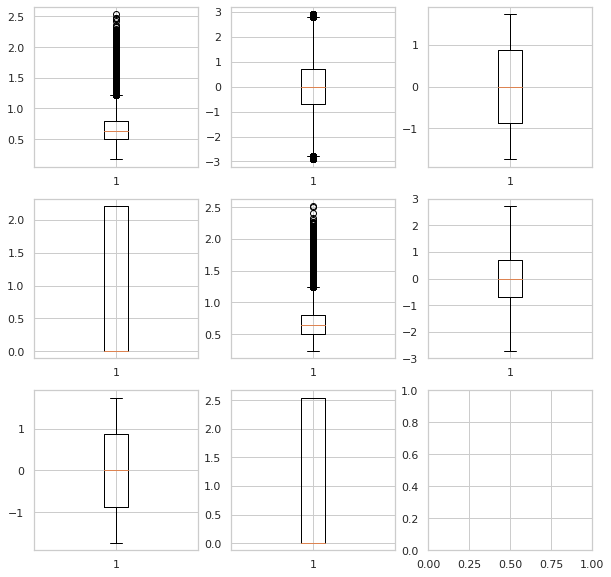

In [ ]:
# Plotting boxplot for outliers detection 

plt.subplots(3,3,figsize=(10,10))
plt.subplot(3,3,1)
plt.boxplot(x[:,9])
plt.subplot(3,3,2)
plt.boxplot(x[:,10])
plt.subplot(3,3,3)
plt.boxplot(x[:,11])
plt.subplot(3,3,4)
plt.boxplot(x[:,12])
plt.subplot(3,3,5)
plt.boxplot(x[:,13])
plt.subplot(3,3,6)
plt.boxplot(x[:,14])
plt.subplot(3,3,7)
plt.boxplot(x[:,15])
plt.subplot(3,3,8)
plt.boxplot(x[:,16])
# plt.subplot(3,3,9)
# plt.boxplot(x[:,8],)
plt.show()


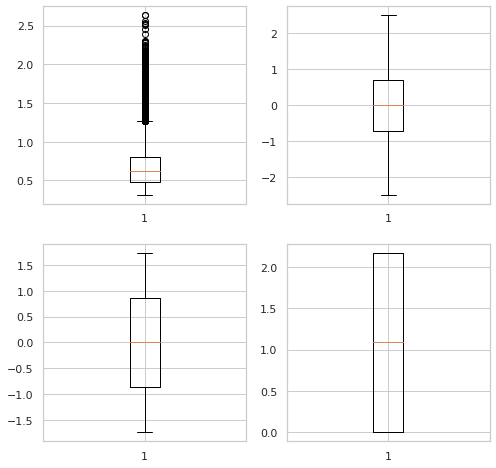

In [ ]:
plt.subplots(5,5,figsize=(8,8))

plt.subplot(221)
plt.boxplot(x[:,17])
plt.subplot(222)
plt.boxplot(x[:,18])
plt.subplot(223)
plt.boxplot(x[:,19])
plt.subplot(224)
plt.boxplot(x[:,8])
plt.show()




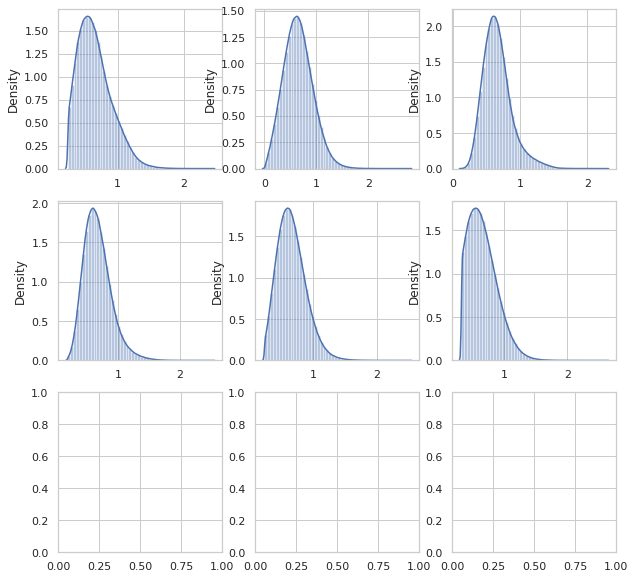

In [ ]:
j=1
plt.subplots(3,3,figsize=(10,10))
for i in [0,3,5,9,13,17]:
#     plt.subplots(3,3,figsize=(10,10))
    plt.subplot(3,3,j)
    sns.distplot(x[:,i])
    j=j+1


### Result : 6 Features have outliers in majority

In [ ]:
# x[:,0] =(x[:,0] <5)
# x[:,3] =(x[:,3] <5)
# x[:,5] =(x[:,5] <4)
# x[:,9] =(x[:,9] <5)
# x[:,13] =(x[:,13] <5)
# x[:,17] =(x[:,17] <5)

# x.shape

<AxesSubplot:>

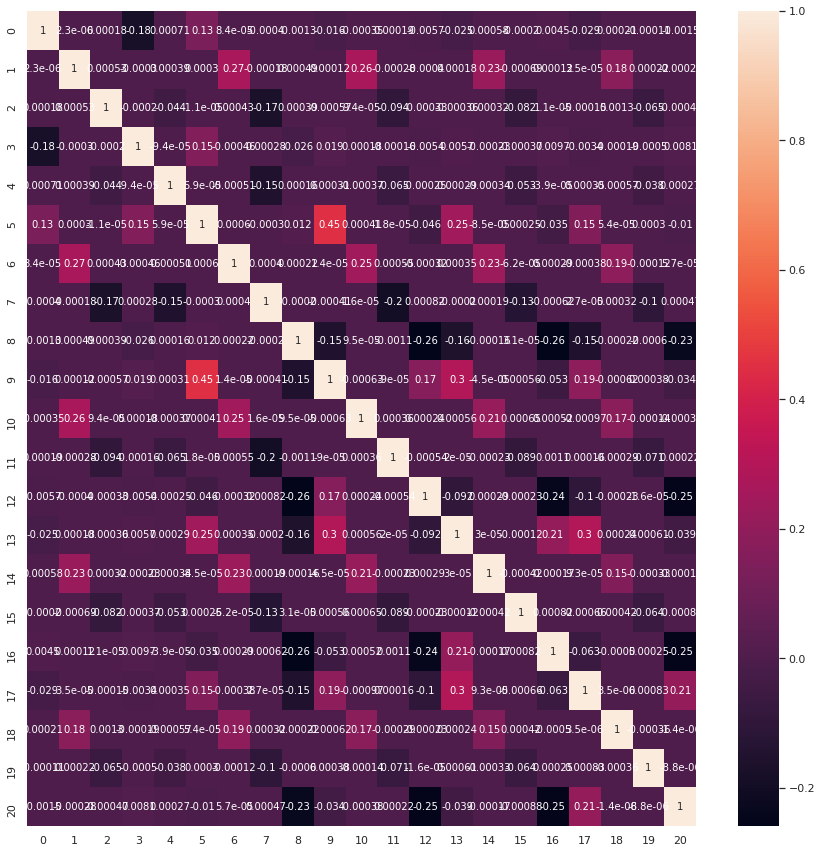

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(x).corr(),annot=True)

# Modelling 

In [10]:
# splitting dataset according to given condition 

def train_test_split(x,y):
    xtrain,xtst,ytrain,ytst= x[0:5500000, :],x[5500000:6000000,:], y[0:5500000],y[5500000:6000000]
    return xtrain,xtst,ytrain,ytst

In [11]:
# xtst.shape[0] = 500k samples

xtrain1,xtst1,ytrain1,ytst1=train_test_split(x,y)
xtst1.shape,xtrain1.shape,ytrain1.shape,ytst1.shape

((499999, 21), (5500000, 21), (5500000,), (499999,))

In [12]:
# roc curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## Scaling

In [13]:
# scaling Robust to the outliers & StandardScaler

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
xtrain1=scaler.fit_transform(xtrain1)
xtst1=scaler.transform(xtst1)



## Linear Models

In [ ]:
#1 . Ridge

from sklearn.linear_model import Ridge
model = Ridge()
model.fit(scaler.fit_transform(xtrain1),ytrain1)
res=model.predict(scaler.transform(xtst1))
#res=res[]
#res=res[:,1:2]
roc_auc_score(ytst1,res)

0.5878525956826809

In [ ]:
# 2. Logistic Regression 
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(xtrain1,ytrain1)

LogisticRegression()

In [ ]:
res=model.predict_proba(xtst1)
res

array([[0.4663803 , 0.5336197 ],
       [0.54358308, 0.45641692],
       [0.5787573 , 0.4212427 ],
       ...,
       [0.51674445, 0.48325555],
       [0.41626745, 0.58373255],
       [0.53045927, 0.46954073]])

In [ ]:
#res=res[]
res=res[:,1:2]
res.shape

(499999, 1)

In [ ]:
roc_auc_score(ytst1,res)

0.5878417589848723

In [ ]:
fpr, tpr, thresholds = roc_curve(ytst1, res)

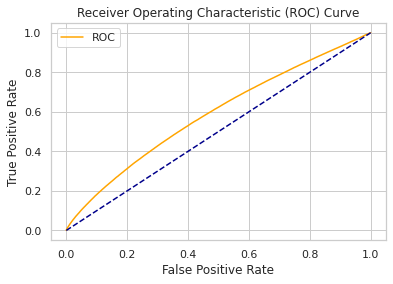

In [ ]:
plot_roc_curve(fpr, tpr)


In [ ]:
# 3. SGDC
from sklearn.linear_model import SGDClassifier
 
model = SGDClassifier(loss='modified_huber')
model.fit(scaler.fit_transform(xtrain1),ytrain1)
res=model.predict_proba(scaler.transform(xtst1))
res=res[:,1:2]
roc_auc_score(ytst1,res)

0.5822043405569197

## Ensembling 

In [ ]:
# 1. Light Boost

import lightgbm as lgb
ll=lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.2,n_estimators=2000)
ll.fit(xtrain1,ytrain1)
pp7=ll.predict_proba(xtst1)
roc_auc_score(ytst1,pp7[:,1])


0.7778974734298716

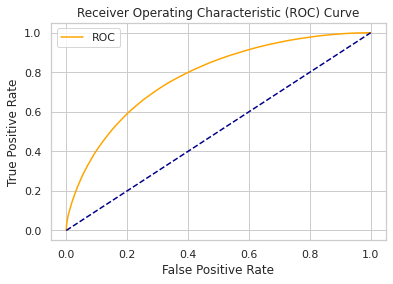

In [ ]:
fpr, tpr, thresholds = roc_curve(ytst1,pp7[:,1])
plot_roc_curve(fpr, tpr)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rr=RandomForestClassifier(n_estimators=100,random_state=0)
# rr.fit(xtrain,ytrain)
# pp4=rr.predict_proba(xtst)
# roc_auc_score(ytst,pp4[:,1])


In [ ]:
# import xgboost as xgb
# xgr = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#                           colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
#                           importance_type='gain', interaction_constraints='',
#                           learning_rate=0.1, max_delta_step=0, max_depth=6,
#                           min_child_weight=1,  monotone_constraints='()',
#                           n_estimators=100, n_jobs=-1, num_parallel_tree=1,
#                           objective='multi:softprob', random_state=0, reg_alpha=0,
#                           reg_lambda=1, scale_pos_weight=None, subsample=1,
#                           tree_method='auto', use_label_encoder=True, validate_parameters=1,
#                           verbosity=0)
# xgr.fit(x_train,y_train)
# pp5=xgr.predict_proba(xtst)
# log_loss(ytst,pp5)

# Task3.B)

# Dimensions Reduction Techniques 

## 1. PCA

In [14]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
x_mod = pca.fit_transform(x)
explained_variance=pca.explained_variance_ratio_
explained_variance.sort()
explained_variance


array([0.00182374, 0.00245522, 0.0035084 , 0.00479537, 0.00519528,
       0.01911343, 0.02945926, 0.04351852, 0.04480468, 0.04736851,
       0.05152413, 0.06100564, 0.06278484, 0.06409615, 0.06518045,
       0.07392716, 0.07977499, 0.09529161, 0.11134309, 0.13171052])

In [15]:
explained_variance
xtrain,xtst=x_mod[0:5500000, :],x_mod[5500000:6000000,:]

0.575712894681692


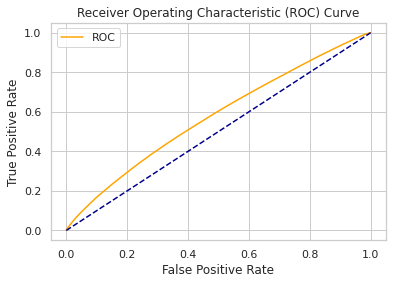

In [ ]:
# After PCA

from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(scaler.fit_transform(xtrain),ytrain1)
res=model.predict_proba(scaler.transform(xtst))
#res=res[]
res=res[:,1:2]
print(roc_auc_score(ytst1,res))

fpr, tpr, thresholds = roc_curve(ytst1,res)
plot_roc_curve(fpr, tpr)



## 2. RFE

In [ ]:
# RFE Technique for dimensions reduction 

from sklearn.feature_selection import RFE
rfe = RFE(estimator=ll, n_features_to_select=21)
# fit RFE
rfe.fit(x, y)
for i in range(x.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000


In [ ]:
# # from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# # LDA_transform = LDA(n_components=20)
# # LDA_transform.fit(x, y)
# # x_mod = LDA_transform.transform(x)
# # xtrain,xtst=x_mod[0:5500000, :],x_mod[5500000:6000000,:]
# from sklearn.decomposition import PCA, IncrementalPCA,KernelPCA, TruncatedSVD,FastICA, MiniBatchDictionaryLearning,SparsePCA

0.7639018232742377


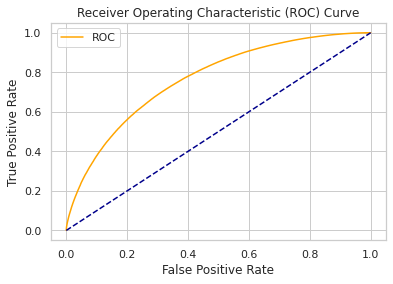

In [ ]:
# After applying PCA
xtrain=scaler.fit_transform(xtrain)
xtst=scaler.transform(xtst)

import lightgbm as lgb
ll=lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.2,n_estimators=2000)
ll.fit(xtrain,ytrain1)
pp7=ll.predict_proba(xtst)
print(roc_auc_score(ytst1,pp7[:,1]))

fpr, tpr, thresholds = roc_curve(ytst1,pp7[:,1])
plot_roc_curve(fpr, tpr)


In [ ]:
# from sklearn.model_selection import cross_val_score, KFold
# #cv = KFold(n_splits=5, random_state=1, shuffle=True)
# scor=cross_val_score(ll,x,y,scoring='roc_auc',cv=5)
# scor

KeyboardInterrupt: 

In [ ]:
# scor2_store=scor
# scor.sum()/5

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier as G
# gg=G(ccp_alpha=0.0, criterion='mse', init=None,
#                            learning_rate=0.1, loss='deviance', max_depth=3,
#                            max_features=None, max_leaf_nodes=None,
#                            min_impurity_decrease=0.0, min_impurity_split=None,
#                            min_samples_leaf=1, min_samples_split=2,
#                            min_weight_fraction_leaf=0.0, n_estimators=100,
#                            n_iter_no_change=None,
#                            random_state=8611, subsample=1.0, tol=0.0001,
#                            validation_fraction=0.1, verbose=0,
#                            warm_start=False)
# gg.fit(xtrain,ytrain)
# pp8=gg.predict_proba(xtst)
# roc_auc_score(ytst,pp8[:,1])


# Neural networks

In [16]:
# importing essential libraries for Keras framework

from keras.models import Sequential
import keras
from keras.layers import Dense, Activation, Dropout

#adam=keras.optimizers.Adam(learning_rate=0.01)


In [17]:
# structure of NN 

def build_model():
    model = Sequential()
    model.add(Dense(128, activation="relu", input_shape = (xtrain1.shape[1],)))  # Hidden Layer 1 
    model.add(Dense(64, activation="relu"))                                     # Hidden Layer 2
    model.add(Dropout(0.2))
    model.add(Dense(32, activation="relu"))                                     # Hidden Layer 3
    model.add(Dropout(0.2))
    model.add(Dense(16, activation="relu"))                                     # Hidden Layer 4
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="sigmoid"))                                   # Outout Layer
    model.summary()
    return model

In [18]:
# Trainng 

model=build_model()
model.compile(optimizer='adam', loss = "binary_crossentropy", metrics = ['accuracy'])
model.fit(xtrain1, ytrain1, batch_size = 64, epochs = 25)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0

In [19]:
validation_loss, validation_accuracy = model.evaluate(xtst1, ytst1, batch_size=32)
print("Loss: "+ str(np.round(validation_loss, 3)))
print("Accuracy: "+ str(np.round(validation_accuracy, 3)))

15625/15625 [==============================] - 17s 1ms/step - loss: 0.5462 - accuracy: 0.7244
Loss: 0.546
Accuracy: 0.724


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()

from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(xtst1).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytst1, y_pred_keras)

In [21]:
from sklearn.metrics import auc
roc_auc_score(ytst1, y_pred_keras)

0.4866810842794288

0.4866810842794288